# Starting Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('mixed_reviews.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    465 non-null    datetime64[ns]
 1   Author  465 non-null    object        
 2   Review  465 non-null    object        
 3   Title   465 non-null    object        
 4   Rating  465 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 18.3+ KB


In [2]:
df.head(5)

,Date,Author,Review,Title,Rating
0,2022-11-05,Tan Ronald,Lazada slow in taking action to scammers.\nMy ...,Lazada slow in action against fraud / scammers,1
1,2020-12-22,Kengy Khor,I have returned an order on Nov 25 and never r...,Refund takes forever,1
2,2020-06-19,jlim,"lazada order\nthe seller a supposedly ""Geth Ma...",cheated by lazada on my first order,1
3,2020-01-23,Barry K,"So Lazada dispute team, it’s almost two weeks ...",Worst service I have ever experienced,1
4,2019-08-16,Xxx Xxx,"Refunding is stupidly complicated, I've contac...",Don't waste your money here,1


In [4]:
df['Date'].max()

Timestamp('2024-10-25 00:00:00')

In [162]:
df.Rating.value_counts()

Rating
1    414
2     18
5     16
3      9
4      8
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

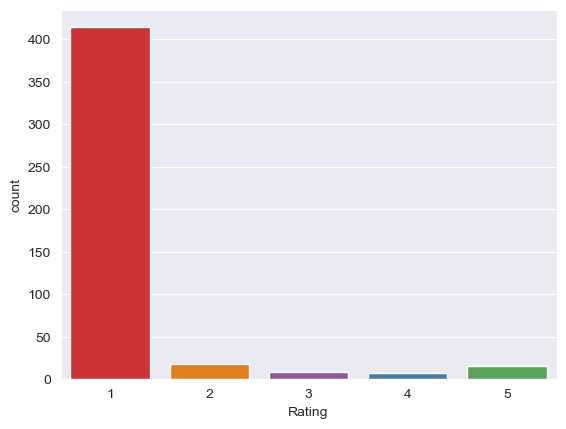

In [6]:
sns.set_style("darkgrid")
sns.countplot(data=df,x='Rating', hue='Rating',palette=['#e41a1c', '#ff7f00', '#984ea3','#377eb8', '#4daf4a'] ,legend=False)

# Timeline Analysis for years

In [10]:
df['year'] = df['Date'].dt.year

In [11]:
df.year.value_counts()

year
2020    105
2021     73
2024     61
2019     51
2022     42
2023     41
2018     40
2017     27
2016     18
2015      5
2014      2
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='count'>

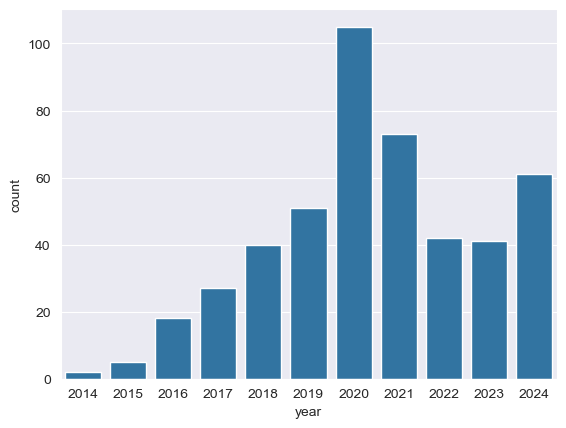

In [12]:

sns.countplot(df,x='year') 

In [10]:
rating_count = df.groupby(['year', 'Rating']).size().reset_index().rename(columns={0:'count'})
rating_count

,year,Rating,count
0,2014,1,2
1,2015,1,2
2,2015,3,1
3,2015,4,1
4,2015,5,1
5,2016,1,14
6,2016,2,2
7,2016,5,2
8,2017,1,22
9,2017,2,1


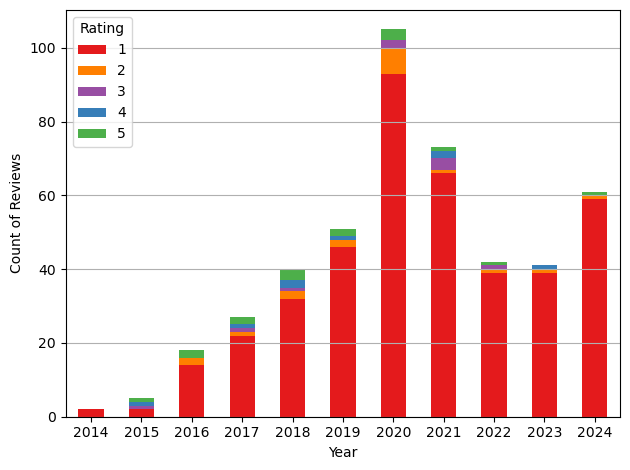

In [12]:
# Pivot the data so that we have a column for each rating
colors = ['#e41a1c', '#ff7f00', '#984ea3','#377eb8', '#4daf4a'] 
rating_pivot = rating_count.pivot(index='year', columns='Rating', values='count')

# Plot the stacked bar chart
ax = rating_pivot.plot(kind='bar', stacked=True,color=colors)

plt.xlabel('Year')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Rating', loc='upper left')
plt.tight_layout()

# Add numbers on top of the bars
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fmt='%d')

plt.tight_layout()
plt.grid(axis = 'y')

# Show the plot
plt.show()

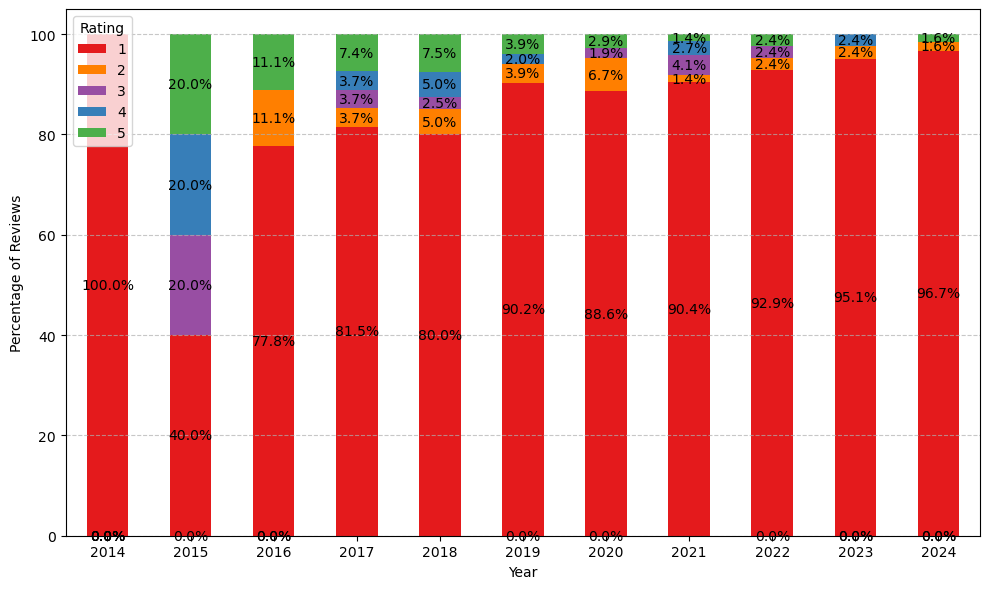

In [14]:
import matplotlib.pyplot as plt

colors = ['#e41a1c', '#ff7f00', '#984ea3','#377eb8', '#4daf4a'] 
# Calculate the percentage for each rating within each year and reset index for alignment
rating_count['percentage'] = rating_count.groupby('year')['count'].apply(lambda x: x / x.sum() * 100).reset_index(drop=True)

# Pivot the data to prepare for plotting percentages
rating_pivot = rating_count.pivot(index='year', columns='Rating', values='percentage')

# Plot the stacked bar chart with percentage values
ax = rating_pivot.plot(kind='bar', stacked=True, figsize=(10, 6),color=colors)

plt.xlabel('Year')
plt.ylabel('Percentage of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Rating', loc='upper left')
plt.tight_layout()

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')  # Display as percentages

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Sentiment Analysis using VADER to make sure that the rating is actually accurate

In [165]:
df

,Date,Author,Review,Title,Rating,year
0,2022-11-05,Tan Ronald,Lazada slow in taking action to scammers.\nMy ...,Lazada slow in action against fraud / scammers,1,2022
1,2020-12-22,Kengy Khor,I have returned an order on Nov 25 and never r...,Refund takes forever,1,2020
2,2020-06-19,jlim,"lazada order\nthe seller a supposedly ""Geth Ma...",cheated by lazada on my first order,1,2020
3,2020-01-23,Barry K,"So Lazada dispute team, it’s almost two weeks ...",Worst service I have ever experienced,1,2020
4,2019-08-16,Xxx Xxx,"Refunding is stupidly complicated, I've contac...",Don't waste your money here,1,2019
...,...,...,...,...,...,...
460,2017-09-11,Leslie T.,FAKE ITEMS I'M SO PISSED!,Bought the $9.90 perfume deals! FRKING WASTE O...,1,2017
461,2019-11-13,wayne c.,Very bad experience buy on Lazada,11/11/2019 I buy one item ROG strix fusion gam...,1,2019
462,2023-03-21,Tony F.,Not good anymore,"Used to be real good,but there is now to many ...",2,2023
463,2016-10-06,Van N.,BE CAREFUL when shopping with LAZADA/LUCKY STO...,I ordered Akira ACP-91M 9000BTU Portable Air-C...,1,2016


In [166]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Valentino
[nltk_data]     Ong\AppData\Roaming\nltk_data...


True

In [167]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [171]:
review_list = df['Review'].to_list()
neg_list = []
neu_list = []
pos_list = []
compound_list = []
for review in review_list:
    scores = analyzer.polarity_scores(review)
    neg_list.append(scores['neg'])
    neu_list.append(scores['neu'])
    pos_list.append(scores['pos'])
    compound_list.append(scores['compound'])

df['neg'] = neg_list
df['neu'] = neu_list
df['pos'] = pos_list
df['compound'] = compound_list

df.head(2)

,Date,Author,Review,Title,Rating,year,neg,neu,pos,compound
0,2022-11-05,Tan Ronald,Lazada slow in taking action to scammers.\nMy ...,Lazada slow in action against fraud / scammers,1,2022,0.068,0.932,0.00,-0.6489
1,2020-12-22,Kengy Khor,I have returned an order on Nov 25 and never r...,Refund takes forever,1,2020,0.068,0.892,0.04,-0.2263


In [174]:
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else: return 'neutral'

df['sentiment'] = df['compound'].apply(classify_sentiment)
df['sentiment'].value_counts()

sentiment
negative    305
positive     98
neutral      62
Name: count, dtype: int64

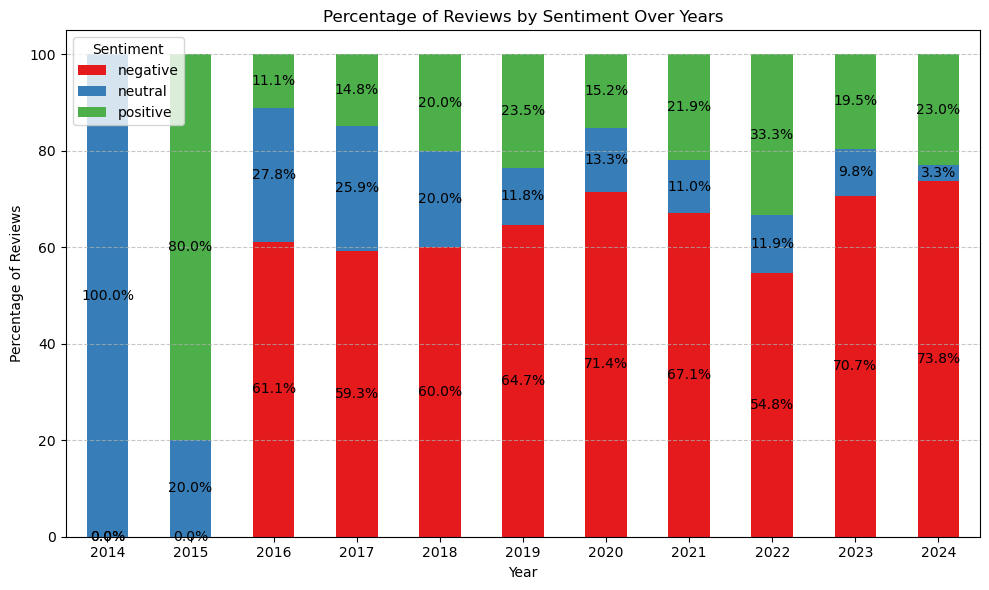

In [183]:
import matplotlib.pyplot as plt

# Example colors for sentiments: negative (red), positive (green), neutral (blue)
colors = ['#e41a1c', '#377eb8', '#4daf4a']  

# Calculate the percentage for each sentiment within each year and reset index for alignment
df['count'] = 1  # Add a count column for each review
sentiment_count = df.groupby(['year', 'sentiment']).count().reset_index()

# Calculate the percentage for each sentiment within each year
sentiment_count['percentage'] = sentiment_count.groupby('year')['count'].apply(lambda x: x / x.sum() * 100).reset_index(drop=True)

# Pivot the data to prepare for plotting percentages
sentiment_pivot = sentiment_count.pivot(index='year', columns='sentiment', values='percentage')

# Plot the stacked bar chart with percentage values for sentiments
ax = sentiment_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Reviews')
plt.title('Percentage of Reviews by Sentiment Over Years')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', loc='upper left')
plt.tight_layout()

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')  # Display as percentages

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Time Analysis for 2024

In [16]:
df_2024 = df[df['year'] == 2024].copy()
df_2024['month'] = df_2024.Date.dt.month
df_2024.head()

,Date,Author,Review,Title,Rating,year,month
13,2024-07-18,Connie Ang,My $5 digital coupons expired and according to...,My $5 digital coupons expired and…,1,2024,7
25,2024-05-27,RJ Chua,lazada has extremely bad customer service and ...,lazada is lousy service provider that indirect...,1,2024,5
29,2024-07-11,Marina,"Useless and incompetent customer service, unab...",Useless and incompetent support…,1,2024,7
32,2024-08-28,Janice Janice,Bought a yoga mat from Lazada seller BFYI. Rec...,Lousy customer support and lousy return and re...,1,2024,8
48,2024-09-18,NurDayana Danel,I ordered a pillowcase from lazada and chose t...,Automated updates & Received Status,1,2024,9


In [17]:
rating_count = df_2024.groupby(['month', 'Rating']).size().reset_index().rename(columns={0:'count'})
rating_count

,month,Rating,count
0,1,1,1
1,2,1,3
2,4,1,7
3,4,5,1
4,5,1,5
5,6,1,6
6,7,1,10
7,8,1,7
8,9,1,10
9,10,1,10


In [19]:
rating_count.pivot(index='month', columns='Rating', values='count')

Rating,1,2,5
month,,,
1,1.0,NaN,NaN
2,3.0,NaN,NaN
4,7.0,NaN,1.0
5,5.0,NaN,NaN
6,6.0,NaN,NaN
7,10.0,NaN,NaN
8,7.0,NaN,NaN
9,10.0,NaN,NaN
10,10.0,1.0,NaN


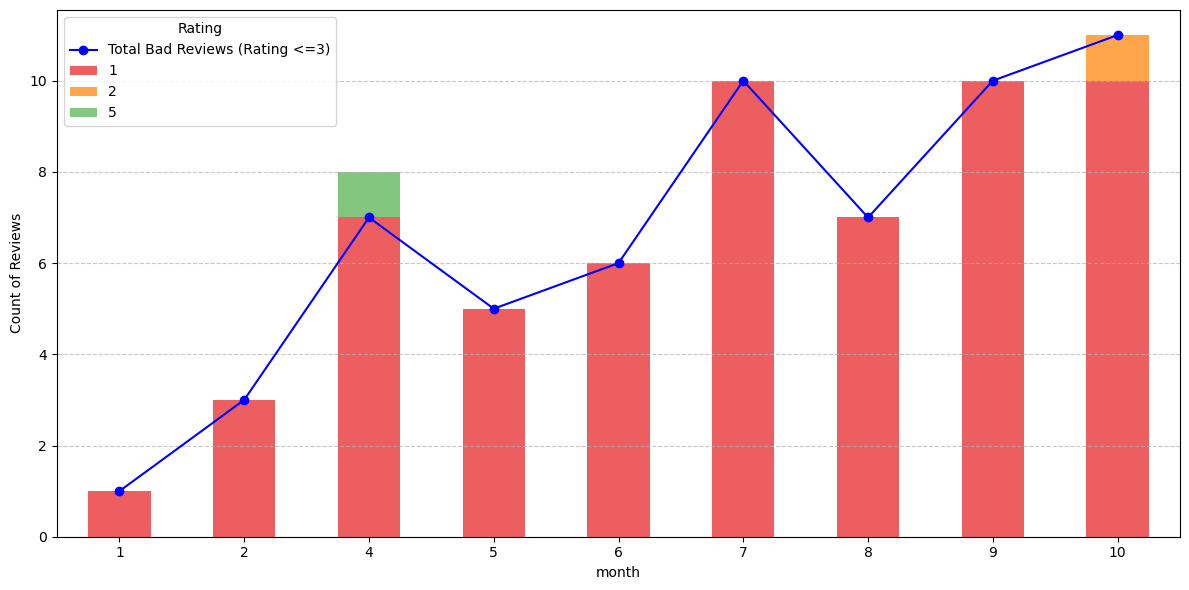

In [186]:
# Dont need to do graph for no of bad reviews in 2024 because its obvious from here already that bad reviews increasing
# Pivot the data so that we have a column for each rating

# Filter and count low-rating reviews for the line chart
df_1_to_3_star = df_2024[df_2024['Rating'] <= 3]
review_counts = df_1_to_3_star['month'].value_counts().sort_index()
review_counts.index = review_counts.index.astype(str)

# Create pivot table for stacked bar chart
colors = ['#e41a1c', '#ff7f00', '#4daf4a'] 
rating_pivot = rating_count.pivot(index='month', columns='Rating', values='count')

# Plot both charts in one figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the line chart
ax1.plot(review_counts.index, review_counts.values, color='blue', marker='o', linestyle='-', label='Total Bad Reviews (Rating <=3)')

ax1.set_xlabel('Month')
ax1.set_ylabel('Count of Reviews')

# Plot the stacked bar chart on the same axis
rating_pivot.plot(kind='bar', stacked=True, color=colors, ax=ax1, alpha=0.7)

# Set labels and legends
plt.xticks(rotation=0)
plt.legend(title='Rating', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

# Preprocessing for word cloud

In [25]:
df_2024.iloc[3].Review

"Bought a yoga mat from Lazada seller BFYI. Received it completely different colour and size which it much smaller.  Missing yoga bag as well. Raised refund request but told to return the item. Tried message seller many times with no reply. Seller even removed the yoga mat listing immediately. Contacted customer service Zoe.... told to get seller agreed then can get refund. There is no way to contact seller as seller just ignored all my messages. As I am not familiar with return item to pick locker process. Ask to arrange pick up which they don't agreed. Obviously this is seller's fault for sending the wrong item but I was penalised. Have to take the trouble to wrap back the item and bring it over to return.  Very disappointed with Lazada.  No support given by customer service agents. They are a bunch of useless people ...Zoe,Don,Brian....only sending emails telling me the same thing  copy and paste over and over again. Can't find solutions.  Very good in marking problems resolved even

## Converting to small letters and removing punctuations

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

def cleanPunc(sentence): 
    # Only clean specific punctuation marks, but keep emojis and other unicode characters
    cleaned = re.sub(r'[?|!|\'|"|#]', r'', sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n", " ")
    return cleaned

df_2024['Review'] = df_2024['Review'].str.lower()
df_2024['Review'] = df_2024['Review'].apply(cleanPunc)
df_2024.iloc[3].Review

'bought a yoga mat from lazada seller bfyi  received it completely different colour and size which it much smaller   missing yoga bag as well  raised refund request but told to return the item  tried message seller many times with no reply  seller even removed the yoga mat listing immediately  contacted customer service zoe     told to get seller agreed then can get refund  there is no way to contact seller as seller just ignored all my messages  as i am not familiar with return item to pick locker process  ask to arrange pick up which they dont agreed  obviously this is sellers fault for sending the wrong item but i was penalised  have to take the trouble to wrap back the item and bring it over to return   very disappointed with lazada   no support given by customer service agents  they are a bunch of useless people    zoe don brian    only sending emails telling me the same thing  copy and paste over and over again  cant find solutions   very good in marking problems resolved eventho

## Removing stopwords

In [28]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within','lazada','app','1','2','3','4','5','6','7','8','9','10','shopee','even'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

df_2024['Review'] = df_2024['Review'].apply(removeStopWords)
df_2024.iloc[3].Review

'bought  yoga mat   seller bfyi  received  completely different colour  size   much smaller   missing yoga bag  well  raised refund request  told  return  item  tried message seller many times   reply  seller  removed  yoga mat listing immediately  contacted customer service zoe     told  get seller agreed   get refund     way  contact seller  seller  ignored   messages      familiar  return item  pick locker process  ask  arrange pick    dont agreed  obviously   sellers fault  sending  wrong item    penalised    take  trouble  wrap back  item  bring    return    disappointed      support given  customer service agents     bunch  useless people    zoe  brian     sending emails telling    thing  copy  paste      cant find solutions    good  marking problems resolved eventhough issues  settled   email follow    issue   frustrated  disappointed'

## Spacy Lemmatizer

In [29]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Define a function to remove stopwords and lemmatize using spaCy
def spacy_lemmatizer(sentence):
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Lemmatize and remove stopwords
    lemmatized_sentence = " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_space and token.lemma_.strip()])
    
    return lemmatized_sentence.strip()

# Apply the function to the 'review' column
df_2024['Review'] = df_2024['Review'].apply(spacy_lemmatizer)

# Check the result for the 5th review
df_2024.iloc[3].Review

'buy yoga mat seller bfyi receive completely different colour size much small miss yoga bag well raise refund request tell return item try message seller many time reply seller remove yoga mat list immediately contact customer service zoe tell get seller agree get refund way contact seller seller ignore message familiar return item pick locker process ask arrange pick do not agree obviously seller fault send wrong item penalise take trouble wrap back item bring return disappoint support give customer service agent bunch useless people zoe brian send email tell thing copy paste can not find solution good mark problem resolve eventhough issue settle email follow issue frustrate disappointed'

# Creating Word Cloud

### Analysis on review with rating 1

In [30]:
rating_1 = df_2024[df_2024['Rating'] == 1]
rating_1

,Date,Author,Review,Title,Rating,year,month
13,2024-07-18,Connie Ang,$ digital coupon expire accord c auto refund i...,My $5 digital coupons expired and…,1,2024,7
25,2024-05-27,RJ Chua,extremely bad customer service defraud custome...,lazada is lousy service provider that indirect...,1,2024,5
29,2024-07-11,Marina,useless incompetent customer service unable ha...,Useless and incompetent support…,1,2024,7
32,2024-08-28,Janice Janice,buy yoga mat seller bfyi receive completely di...,Lousy customer support and lousy return and re...,1,2024,8
48,2024-09-18,NurDayana Danel,order pillowcase choose postal delivery option...,Automated updates & Received Status,1,2024,9
49,2024-06-10,Buyer,bad customer service earth call answer agent c...,Lazada has the worst customer servicd…,1,2024,6
50,2024-04-20,Laura Wang,buy iphone 15 apple flagship store realize sto...,I bought a iPhone 15 from their Apple…,1,2024,4
51,2024-05-11,Jacqueline,customer service get bad everything make diffi...,Customer Service is not as good anymore,1,2024,5
56,2024-07-15,Hari Haran,bad return experience buy gopro pro 12 return ...,worst return experience!,1,2024,7
58,2024-08-17,Jeff,take note live agent go name cynthia zoe espec...,Take note of two live agents going by…,1,2024,8


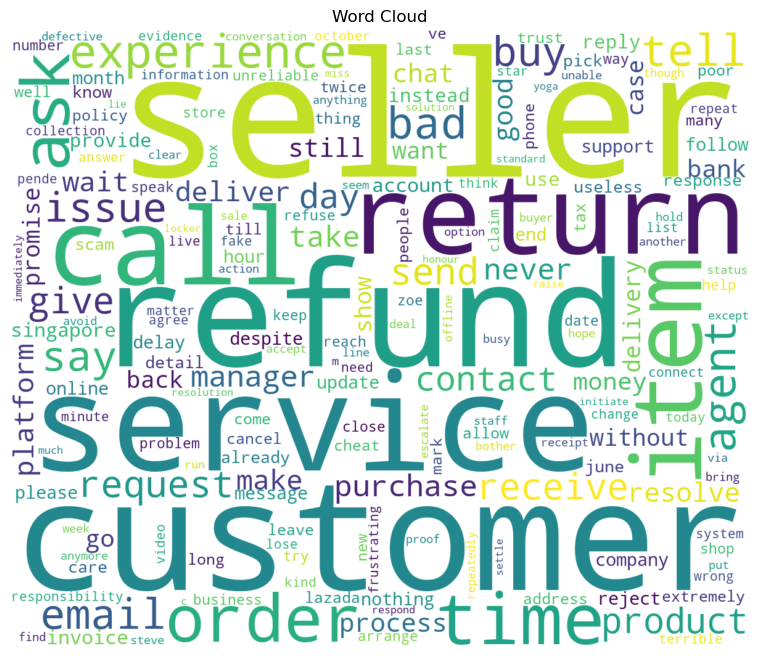

In [33]:
from wordcloud import WordCloud

# Concatenate all descriptions into a single string
text_cat = ' '.join(rating_1['Review'].values)

# Generate the word cloud
wordcloud = WordCloud(max_font_size=None, background_color='white',collocations=False,
                      width=1200, height=1000).generate(text_cat)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis("off")
plt.show()

In [34]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize the text and count occurrences of each word
word_counts = Counter(word_tokenize(' '.join(rating_1['Review'])))

# Print the word counts
print(word_counts)

Counter({'seller': 77, 'customer': 75, 'refund': 68, 'service': 57, 'return': 50, 'call': 47, 'item': 38, 'time': 33, 'ask': 29, 'not': 28, 'order': 28, 'experience': 27, 'agent': 25, 'tell': 24, 'bad': 24, 'get': 23, 'say': 22, 'email': 22, 'issue': 21, 'do': 21, 'buy': 21, 'request': 21, 'send': 21, 'receive': 20, 'give': 20, 'product': 19, '🔥': 19, 'contact': 18, 'day': 18, 'purchase': 18, 'manager': 18, 'never': 17, 'take': 17, 'platform': 15, 'deliver': 15, 'make': 15, 'wait': 15, '🤬': 15, 'good': 14, 'resolve': 14, 'process': 13, 'chat': 13, 'still': 13, 'go': 12, 'money': 12, 'bank': 12, 'without': 11, 'promise': 11, 'back': 11, 'delivery': 11, 'show': 11, 'would': 11, 'want': 11, 'case': 11, 'singapore': 11, 'invoice': 11, '$': 10, 'provide': 10, 'use': 10, 'reply': 10, 'can': 10, 'instead': 10, 'like': 10, 'account': 10, 'company': 9, 'message': 9, 'support': 9, 'follow': 9, 'update': 9, 'could': 9, 'reject': 9, 'end': 9, 'please': 9, 'month': 9, 'delay': 9, 'online': 9, 'hour

In [35]:
# Access the first 10 words and their counts
first_10_words = word_counts.most_common(10)

# Print the first 20 words and their counts
print(first_10_words)

[('seller', 77), ('customer', 75), ('refund', 68), ('service', 57), ('return', 50), ('call', 47), ('item', 38), ('time', 33), ('ask', 29), ('not', 28)]


In [38]:
# Create a DataFrame from the subset_words list
df_1_star = pd.DataFrame(first_10_words, columns=['word', 'count'])

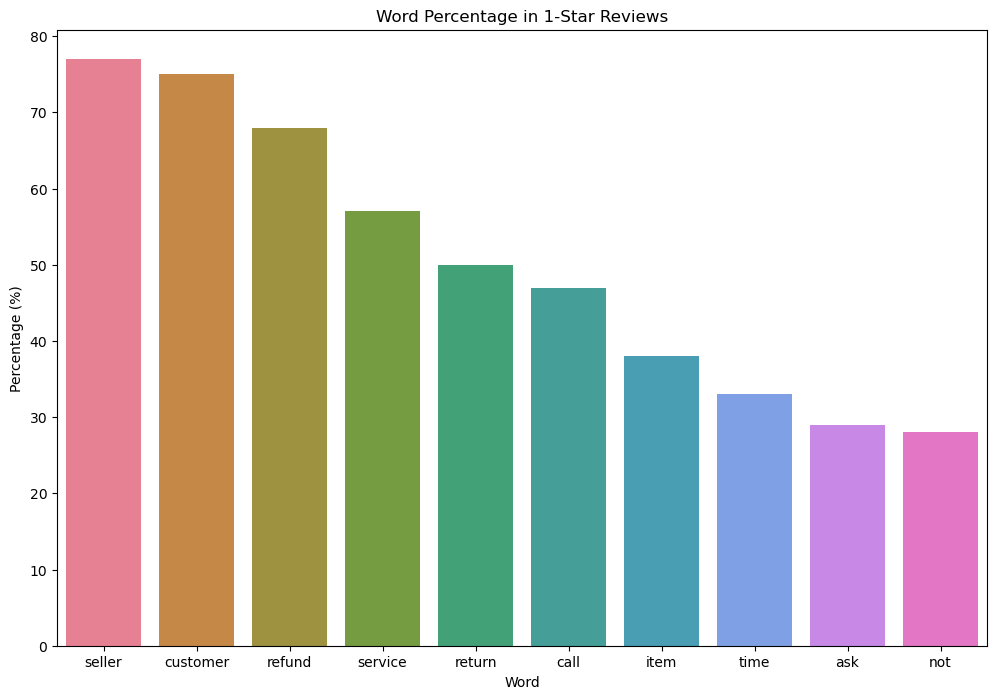

In [39]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Use the `palette` argument to assign different colors to each bar
sns.barplot(data=df_1_star, x='word', y='count', palette="husl")  # 'husl' generates unique colors

# Set plot labels and title
plt.xlabel('Word')
plt.ylabel('Percentage (%)')
plt.title('Word Percentage in 1-Star Reviews')

# Display the plot
plt.show()

### Not able to do word cloud for other rating because too little count

In [40]:
rating_2 = df_2024[df_2024['Rating'] == 2]
rating_2

,Date,Author,Review,Title,Rating,year,month
225,2024-10-14,Tay Tiow Boon,order iona l oven toaster 30 24 10x facemask d...,Bought Iona 10 L Oven Toaster,2,2024,10


# Topic Modeling for review wit rating <= 3 for most recent 3 months

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from pprint import pprint

df = pd.read_excel("mixed_reviews.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Rating'] <= 3) & (df['Date'] >= "2024-08")].reset_index().copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   28 non-null     int64         
 1   Date    28 non-null     datetime64[ns]
 2   Author  28 non-null     object        
 3   Review  28 non-null     object        
 4   Title   28 non-null     object        
 5   Rating  28 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ KB


In [15]:
# Gensim (Topic Modeling Pacakge)
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within','lazada','app','1','2','3','4','5','6','7','8','9','10','shopee','even'])

In [16]:
df.Review[5]

'\n\nI recently had a terrible experience with Lazada. After purchasing an item for over $800, the Chinese seller sent me the wrong product. While the seller was willing to accept a return and refund, Lazada\'s customer service has been incredibly frustrating.\n\nDespite repeated requests, Lazada has failed to arrange a pickup for the incorrect item. After two weeks of waiting, they unexpectedly canceled my refund request and marked it as received. When I contacted customer service, they claimed they hadn\'t arranged the pickup and it was the seller. This contradicts their previous assurances over the phone and chat (which I have records for).\n\nI\'ve contacted customer service almost daily, but I\'ve received the same unhelpful responses and excuses. They\'ve even provided conflicting information about their "higher department" and the availability of supervisors or managers.\n\nBased on my experience, I strongly advise against purchasing from Lazada. Their customer service is unreli

In [17]:
# Convert to list
data = df.Review.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[5:6])

[' I recently had a terrible experience with Lazada. After purchasing an item for over $800, the Chinese seller sent me the wrong product. While the seller was willing to accept a return and refund, Lazadas customer service has been incredibly frustrating. Despite repeated requests, Lazada has failed to arrange a pickup for the incorrect item. After two weeks of waiting, they unexpectedly canceled my refund request and marked it as received. When I contacted customer service, they claimed they hadnt arranged the pickup and it was the seller. This contradicts their previous assurances over the phone and chat (which I have records for). Ive contacted customer service almost daily, but Ive received the same unhelpful responses and excuses. Theyve even provided conflicting information about their "higher department" and the availability of supervisors or managers. Based on my experience, I strongly advise against purchasing from Lazada. Their customer service is unreliable, and they seem m

In [18]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[5])

['recently', 'had', 'terrible', 'experience', 'with', 'lazada', 'after', 'purchasing', 'an', 'item', 'for', 'over', 'the', 'chinese', 'seller', 'sent', 'me', 'the', 'wrong', 'product', 'while', 'the', 'seller', 'was', 'willing', 'to', 'accept', 'return', 'and', 'refund', 'lazadas', 'customer', 'service', 'has', 'been', 'incredibly', 'frustrating', 'despite', 'repeated', 'requests', 'lazada', 'has', 'failed', 'to', 'arrange', 'pickup', 'for', 'the', 'incorrect', 'item', 'after', 'two', 'weeks', 'of', 'waiting', 'they', 'unexpectedly', 'canceled', 'my', 'refund', 'request', 'and', 'marked', 'it', 'as', 'received', 'when', 'contacted', 'customer', 'service', 'they', 'claimed', 'they', 'hadnt', 'arranged', 'the', 'pickup', 'and', 'it', 'was', 'the', 'seller', 'this', 'contradicts', 'their', 'previous', 'assurances', 'over', 'the', 'phone', 'and', 'chat', 'which', 'have', 'records', 'for', 'ive', 'contacted', 'customer', 'service', 'almost', 'daily', 'but', 'ive', 'received', 'the', 'same',

In [19]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=3)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[5]]])

['recently', 'had', 'terrible', 'experience_with', 'lazada', 'after', 'purchasing', 'an', 'item', 'for', 'over', 'the', 'chinese', 'seller', 'sent', 'me', 'the', 'wrong', 'product', 'while', 'the_seller', 'was', 'willing', 'to', 'accept', 'return', 'and', 'refund', 'lazadas', 'customer_service', 'has_been', 'incredibly', 'frustrating', 'despite', 'repeated', 'requests', 'lazada', 'has', 'failed', 'to', 'arrange', 'pickup', 'for', 'the', 'incorrect', 'item', 'after', 'two', 'weeks', 'of', 'waiting', 'they', 'unexpectedly', 'canceled', 'my', 'refund_request', 'and', 'marked', 'it', 'as', 'received', 'when', 'contacted_customer', 'service', 'they', 'claimed', 'they', 'hadnt', 'arranged', 'the', 'pickup', 'and', 'it_was', 'the_seller', 'this', 'contradicts', 'their', 'previous', 'assurances', 'over', 'the', 'phone', 'and', 'chat', 'which', 'have', 'records', 'for', 'ive', 'contacted_customer', 'service', 'almost', 'daily', 'but', 'ive', 'received', 'the', 'same', 'unhelpful', 'responses', 

In [20]:
'''
The bigrams model is ready. Let’s define the functions to remove the stopwords, 
make bigrams and lemmatization and call them sequentially.
'''
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [21]:
'''
Let’s call the functions in order.
'''
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

'''
If it reports error "Can't find model 'en'. It doesn't seem to be a shortcut link, 
a Python package or a valid path to a data directory", you need to do following in command line:

> python -m spacy download en

It works only if you have administrator rights as the installation folder needs that. Otherwise
you will receive error "Download successful but linking failed. Creating a shortcut link for 'en' 
didn't work (maybe you don't have admin permissions?), but you can still load the model via its 
full package name: nlp = spacy.load('en_core_web_sm')". It may not work even you do as suggested.
In such case, you need to open Anadaconda's cmd prompt as an Administrator:

1. Right clik on the Anaconda Promt Icon
2. Go to "More" and click on "Open as Administrator"
3. Then type: python -m spacy download en
'''

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[5])

['recently', 'terrible', 'experience', 'purchase', 'item', 'chinese', 'seller', 'send', 'wrong', 'product', 'seller', 'willing', 'accept', 'return', 'refund', 'customer_service', 'incredibly', 'frustrating', 'repeat', 'request', 'fail', 'arrange', 'pickup', 'incorrect', 'item', 'week', 'wait', 'unexpectedly', 'cancel', 'mark', 'receive', 'contacted_customer', 'service', 'claim', 'arrange', 'pickup', 'seller', 'contradict', 'previous', 'assurance', 'phone', 'chat', 'record', 've', 'contacted_customer', 'service', 'almost', 'daily', 've', 'receive', 'unhelpful', 'response', 'excuse', 've', 'provide', 'conflicting', 'information', 'high', 'department', 'availability', 'supervisor', 'manager', 'base', 'experience', 'strongly', 'advise', 'purchase', 'customer_service', 'unreliable', 'seem', 'interested', 'avoid', 'responsibility', 'resolve', 'customer', 'issue', 'safe', 'money', 'platform']


In [22]:
'''
The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus.
Let’s create them.
'''
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[4:5])

[[(0, 4), (3, 3), (12, 2), (14, 1), (15, 1), (19, 2), (26, 1), (28, 1), (32, 3), (38, 1), (44, 4), (49, 2), (50, 5), (54, 12), (55, 5), (56, 1), (57, 3), (58, 1), (64, 2), (65, 1), (66, 2), (72, 1), (73, 1), (75, 2), (95, 1), (96, 3), (104, 2), (107, 1), (108, 2), (112, 3), (115, 1), (121, 2), (130, 4), (134, 2), (136, 1), (138, 1), (146, 1), (148, 2), (149, 1), (150, 1), (151, 3), (152, 1), (153, 1), (154, 1), (155, 2), (156, 1), (157, 1), (158, 1), (159, 1), (160, 1), (161, 1), (162, 1), (163, 1), (164, 1), (165, 1), (166, 3), (167, 1), (168, 1), (169, 2), (170, 2), (171, 1), (172, 1), (173, 2), (174, 1), (175, 3), (176, 1), (177, 1), (178, 1), (179, 2), (180, 1), (181, 1), (182, 1), (183, 1), (184, 1), (185, 1), (186, 1), (187, 1), (188, 1), (189, 1), (190, 1), (191, 1), (192, 1), (193, 2), (194, 1), (195, 1), (196, 2), (197, 1), (198, 1), (199, 1), (200, 1), (201, 1), (202, 2), (203, 2), (204, 1), (205, 1), (206, 2), (207, 1), (208, 1), (209, 1), (210, 1), (211, 1), (212, 1), (213,

In [11]:
'''
We have everything required to train the LDA model.
In addition to the corpus and dictionary, you need to provide the number of topics as well.

Apart from that, alpha and eta are hyperparameters that affect sparsity of the topics.
According to the Gensim docs, both defaults to 1.0/num_topics prior.

chunksize is the number of documents to be used in each training chunk.

update_every determines how often the model parameters should be updated and 
passes is the total number of training passes.
'''
# Build LDA model
import gensim
from gensim.models.coherencemodel import CoherenceModel

# Define the function to train LDA models with different numbers of topics
def test_lda_models(corpus, id2word, data_lemmatized, topic_range, passes=25, random_state=100):
    results = []

    for num_topics in topic_range:
        # Train the LDA model
        lda_model = gensim.models.ldamodel.LdaModel(
            corpus=corpus,
            id2word=id2word,
            num_topics=num_topics,
            random_state=random_state,
            update_every=1,
            passes=passes,
            alpha=0.01,
            eta=0.01,
            per_word_topics=True
        )

        # Compute Perplexity
        perplexity = lda_model.log_perplexity(corpus)

        # Compute Coherence Score
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()

        # Append results
        results.append({
            'num_topics': num_topics,
            'perplexity': perplexity,
            'coherence_score': coherence_score
        })

        # Print the results for the current model
        print(f'Number of Topics: {num_topics}, Perplexity: {perplexity:.4f}, Coherence Score: {coherence_score:.4f}')

    return results

# Define the range of topics you want to test
topic_range = range(3, 15, 1)  # Example: Test from 5 to 15 topics, in steps of 1

# Run the function and collect results
results = test_lda_models(corpus=corpus, id2word=id2word, data_lemmatized=data_lemmatized, topic_range=topic_range)
results_df = pd.DataFrame(results)


Number of Topics: 3, Perplexity: -7.6155, Coherence Score: 0.3334
Number of Topics: 4, Perplexity: -7.5871, Coherence Score: 0.2947
Number of Topics: 5, Perplexity: -7.5756, Coherence Score: 0.3302
Number of Topics: 6, Perplexity: -7.5703, Coherence Score: 0.3424
Number of Topics: 7, Perplexity: -7.5495, Coherence Score: 0.3171
Number of Topics: 8, Perplexity: -7.5433, Coherence Score: 0.3053
Number of Topics: 9, Perplexity: -7.5567, Coherence Score: 0.2704
Number of Topics: 10, Perplexity: -7.5055, Coherence Score: 0.3272
Number of Topics: 11, Perplexity: -7.5453, Coherence Score: 0.3617
Number of Topics: 12, Perplexity: -7.5250, Coherence Score: 0.3957
Number of Topics: 13, Perplexity: -7.4615, Coherence Score: 0.3967
Number of Topics: 14, Perplexity: -7.5542, Coherence Score: 0.4068


In [23]:
'''
We have everything required to train the LDA model.
In addition to the corpus and dictionary, you need to provide the number of topics as well.

Apart from that, alpha and eta are hyperparameters that affect sparsity of the topics.
According to the Gensim docs, both defaults to 1.0/num_topics prior.

chunksize is the number of documents to be used in each training chunk.

update_every determines how often the model parameters should be updated and 
passes is the total number of training passes.
'''
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           passes=25,
                                           alpha=0.01,
                                            eta=0.01,
                                           per_word_topics=True)

In [24]:
# Display the topics
topics = lda_model.show_topics(num_topics=13, num_words=10, formatted=False)

# Print the topics in a readable format
print("Topics found via LDA:\n")
for idx, topic in topics:
    print(f"Topic #{idx+1}:")
    print(" ".join([word for word, _ in topic]))
    print()

Topics found via LDA:

Topic #1:
return refund customer_service experience customer seller day receive item give

Topic #2:
return delivery product seller order deliver option get update customer_service

Topic #3:
return order seller time ask go refund item agent call

Topic #4:
seller refund buy return item ask order issue customer_service time

Topic #5:
call terrible update service send direct customer_service chat experience address



### Topic #0: Return & Refund Experience
Main Idea: Complaints about the return and refund process, particularly the customer service experience. Users are frustrated with how their returns are handled by sellers, including delays in receiving refunds or returns, and poor customer service. There’s also a sense that the item and refund process didn’t meet expectations, leading to dissatisfaction.
### Topic #1: Delivery & Seller Issues
Main Idea: Complaints about delivery and seller performance. Customers are expressing issues with product delivery, whether it's delayed, incorrect, or missing items. They mention order options and the delivery update process, indicating dissatisfaction with the fulfillment or communication from the seller and customer service.
### Topic #2: Order & Refund Delays
Main Idea: Complaints related to order delays, refunds, and difficulty in reaching a seller or agent. Customers are frustrated with having to follow up on returns, asking for refunds, or waiting too long for order resolution, with some specifically mentioning agents or calls that don’t provide the help they need.
### Topic #3: Seller & Order Issues
Main Idea: Similar to Topic #2, but with more emphasis on seller performance. Complaints focus on orders, refunds, and problems with sellers when trying to return items. Issues include items not being as expected or not matching the description, and poor response from the customer service team.
### Topic #4: Customer Service Call Experience
Main Idea: Complaints about customer service, specifically the experience during calls. Customers describe their interactions with customer service as terrible, with dissatisfaction around the quality of support, chat services, and the addressing of their concerns. There’s mention of frustration about being passed around without proper assistance or resolution.
### Summary:
These topics mainly revolve around customer dissatisfaction with returns, refunds, delivery, order fulfillment, and seller performance. A common thread is poor customer service, with complaints about delayed responses, lack of resolution, and the overall customer experience being frustrating. This suggests that improving communication, quicker issue resolution, and better seller support could enhance user satisfaction.

In [26]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.035*"return" + 0.022*"refund" + 0.022*"customer_service" + '
  '0.022*"experience" + 0.017*"customer" + 0.017*"seller" + 0.017*"day" + '
  '0.017*"receive" + 0.013*"item" + 0.013*"give"'),
 (1,
  '0.042*"return" + 0.025*"delivery" + 0.021*"product" + 0.021*"seller" + '
  '0.020*"order" + 0.020*"deliver" + 0.020*"option" + 0.020*"get" + '
  '0.016*"update" + 0.015*"customer_service"'),
 (2,
  '0.039*"return" + 0.017*"order" + 0.017*"seller" + 0.015*"time" + '
  '0.013*"ask" + 0.013*"go" + 0.012*"refund" + 0.012*"item" + 0.012*"agent" + '
  '0.010*"call"'),
 (3,
  '0.053*"seller" + 0.019*"refund" + 0.016*"buy" + 0.014*"return" + '
  '0.014*"item" + 0.012*"ask" + 0.012*"order" + 0.012*"issue" + '
  '0.011*"customer_service" + 0.011*"time"'),
 (4,
  '0.046*"call" + 0.046*"terrible" + 0.023*"update" + 0.023*"service" + '
  '0.023*"send" + 0.023*"direct" + 0.023*"customer_service" + 0.023*"chat" + '
  '0.023*"experience" + 0.023*"address"')]


In [27]:
'''
Model perplexity and topic coherence provide a convenient measure to judge 
how good a given topic model is. In my experience, topic coherence score, 
in particular, has been more helpful.
'''
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -7.5756044703003464

Coherence Score:  0.33015648552056037


In [28]:
'''
Now that the LDA model is built, the next step is to examine the produced 
topics and the associated keywords. There is no better tool than pyLDAvis package’s 
interactive chart and is designed to work well with jupyter notebooks.
'''
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [29]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.070819 -0.061606       1        1  42.832742
2      0.193374 -0.028428       2        1  26.415155
0      0.094027  0.208001       3        1  15.116160
1     -0.090107 -0.232164       4        1  13.142302
4     -0.268112  0.114196       5        1   2.493641, topic_info=                 Term       Freq      Total Category  logprob  loglift
368              call  12.000000  12.000000  Default  30.0000  30.0000
27               give  11.000000  11.000000  Default  29.0000  29.0000
15   customer_service  17.000000  17.000000  Default  28.0000  28.0000
87         experience  14.000000  14.000000  Default  27.0000  27.0000
54             return  40.000000  40.000000  Default  26.0000  26.0000
..                ...        ...        ...      ...      ...      ...
57            service   0.864950  13.693302   Topic5  -3.7595   0.9294
56               send   0.864882   8.742627   Topic5  -3.7596   1.3781
15   customer_service   0.864851  17.570743   Topic5  -3.7596   0.6800
87         experience   0.864751  14.623611   Topic5  -3.7597   0.8635
27               give   0.864724  11.729763   Topic5  -3.7598   1.0840

[300 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
148       2  0.992203  acknowledgement
288       1  0.172974          address
288       3  0.518921          address
288       4  0.172974          address
288       5  0.172974          address
...     ...       ...              ...
71        5  0.260457             well
73        1  0.404401            wrong
73        2  0.202201            wrong
73        4  0.404401            wrong
74        1  0.994282             yoga

[364 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 5])

In [23]:
pyLDAvis.save_html(vis, 'lda_topics_visualization.html')